# **Análisis exploratorio de datos (EDA)**

**Importamos las librerías que vamos a utilizar**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### **1- Dataset Electric and Alternative fuel charging Stations**

**Importamos los datos en un dataframe**

In [2]:
df_fuel_stations = pd.read_parquet('Electric and Alternative Fuel Charging Stations.parquet')

**Observamos el dataframe**

In [3]:
df_fuel_stations.head()

,Fuel Type Code,Station Name,Street Address,Borough,Latitude,Longitude
0,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,40.718037,-73.932309
1,CNG,Canarsie - National Grid,8424 Ditmas Ave,Brooklyn,40.645540,-73.918344
2,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,40.844188,-73.861572
3,CNG,Con Edison - College Point Service Center,124-15 31st Ave,Queens,40.769623,-73.843069
4,CNG,Bronx Zoo,2300 Southern Blvd,Bronx,40.850018,-73.878128


**Contenidos del dataframe por columna:**
* **Fuel Type Code**: Representa el código del tipo de combustible que ofrece la estación de servicio.
* **Station Name**: Es el nombre de la estación de servicio.
* **Street Address**: La dirección física de la estación de servicio en la calle.
* **City**: La ciudad donde se encuentra la estación de servicio.
* **State**: El estado donde se encuentra la estación de servicio.
* **Latitude**: La latitud geográfica de la ubicación de la estación de servicio.
* **Longitude**: La longitud geográfica de la ubicación de la estación de servicio.

**Buscamos valores nulos**

In [4]:
df_fuel_stations.isnull().sum()

Fuel Type Code    0
Station Name      0
Street Address    0
Borough           0
Latitude          0
Longitude         0
dtype: int64

**Verificamos valores duplicados en el DataFrame**

In [5]:
df_fuel_stations.duplicated().sum()

0

**Observamos los tipos de datos de cada columna**

In [6]:
df_fuel_stations.dtypes

Fuel Type Code     object
Station Name       object
Street Address     object
Borough            object
Latitude          float64
Longitude         float64
dtype: object

**Revisamos los valores de la columna 'Fuel Type Code'**

In [7]:
df_fuel_stations['Fuel Type Code'].value_counts()

Fuel Type Code
ELEC    183
CNG      11
E85       3
BD        1
Name: count, dtype: int64

**Visualizamos los valores en un grafico de barras**

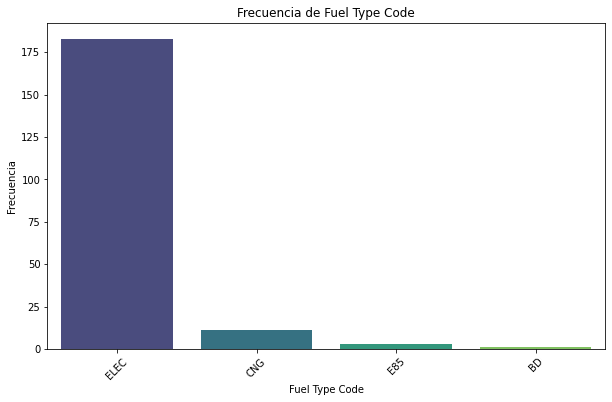

In [8]:
# Utilizar df_fuel_stations['Fuel Type Code'].value_counts() para obtener la frecuencia de cada valor
frecuencia_fuel_type = df_fuel_stations['Fuel Type Code'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_fuel_type.index, y=frecuencia_fuel_type.values, palette='viridis')
plt.title('Frecuencia de Fuel Type Code')
plt.xlabel('Fuel Type Code')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejorar la legibilidad
plt.show()

In [9]:
# Obtener la frecuencia de cada valor en la columna 'Fuel Type Code'
frecuencia_por_valor = df_fuel_stations['Fuel Type Code'].value_counts()

# Obtener el total de la columna 'Fuel Type Code'
total_valores = frecuencia_por_valor.sum()

# Calcular el porcentaje del total para cada valor
(frecuencia_por_valor / total_valores) * 100

Fuel Type Code
ELEC    92.424242
CNG      5.555556
E85      1.515152
BD       0.505051
Name: count, dtype: float64

Observaciones: el valor 'ELEC' predomina en la columna 'Fuel Type Code', estando en un casi 95% del total de los valores

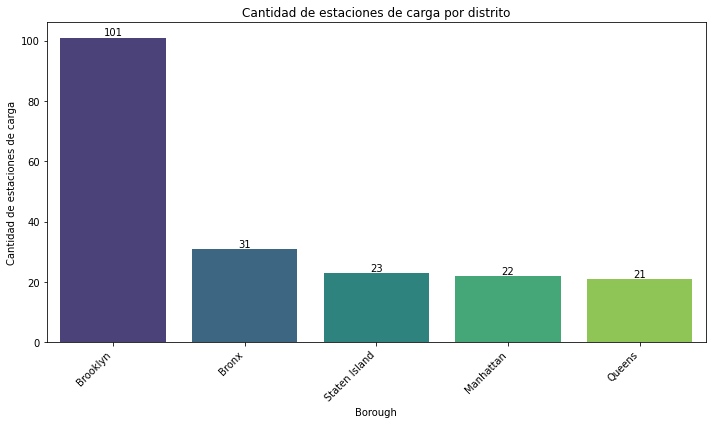

In [10]:
# Contar la cantidad de estaciones de carga por borough
stations_per_borough = df_fuel_stations['Borough'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=stations_per_borough.index, y=stations_per_borough.values, palette='viridis')
plt.xlabel('Borough')
plt.ylabel('Cantidad de estaciones de carga')
plt.title('Cantidad de estaciones de carga por distrito')

# Añadir el valor de cada barra
for index, value in enumerate(stations_per_borough):
    barplot.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Revisamos los valores de la columna 'Cylinders'**

**Revisamos los valores de la columna 'Transmission'**

**Revisamos los valores de la columna 'Fuel'**

#### **2- Dataset Taxi_Zones**

**Importamos los datos en un dataframe**

In [11]:
taxi_zones = pd.read_parquet('taxi_zones.parquet')

**Observamos el dataframe**

In [12]:
taxi_zones.head()

,Zone,LocationID,Borough
0,Newark Airport,1,EWR
1,Jamaica Bay,2,Queens
2,Allerton/Pelham Gardens,3,Bronx
3,Alphabet City,4,Manhattan
4,Arden Heights,5,Staten Island


**Contenidos del dataframe por columna:**

* **Zone**: Nombre de la zona de taxi.
* **LocationID**: Identificación única de ubicación.
* **Borough**: Nombre del distrito (o "borough") al que pertenece la zona de taxi.

**Buscamos valores nulos**

In [13]:
taxi_zones.isnull().sum()

Zone          0
LocationID    0
Borough       0
dtype: int64

**Verificamos valores duplicados en el DataFrame**

In [14]:
taxi_zones.duplicated().sum()

3

**Borramos los valores duplicados**

In [15]:
taxi_zones.drop_duplicates(inplace=True)

**Observamos los tipos de datos de cada columna**

In [16]:
taxi_zones.dtypes

Zone          object
LocationID     int64
Borough       object
dtype: object

**Revisamos los valores de la columna 'Borough'**

In [17]:
taxi_zones['Borough'].value_counts()

Borough
Queens           68
Manhattan        67
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Name: count, dtype: int64

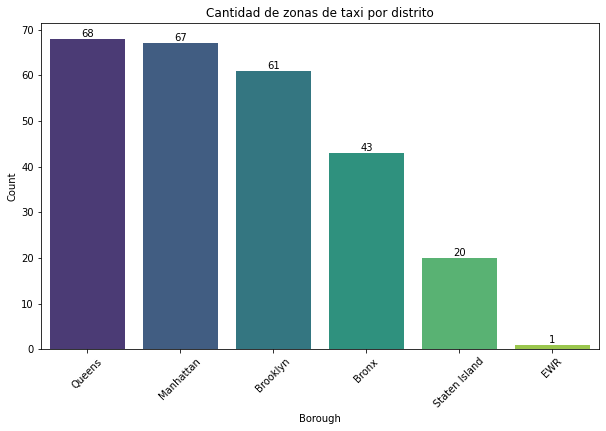

In [18]:
# Obtener los datos de conteo de zonas de taxi por distrito ("borough")
borough_counts = taxi_zones['Borough'].value_counts()

# Crear el gráfico de barras con el estilo 'viridis'
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=borough_counts.index, y=borough_counts, palette='viridis')

# Agregar el número en cada barra
for index, value in enumerate(borough_counts):
    barplot.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Cantidad de zonas de taxi por distrito')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.show()

**Observaciones:** este dataframe sirve mas que nada para identificar el distrito y cada zona de taxis, asignandole un ID a cada uno.

#### **3- Dataset Vehicle Fuel Economy Data**

**Importamos los datos en un dataframe**

In [19]:
fuel_economy = pd.read_parquet('Vehicle Fuel Economy Data.parquet')

**Observamos el dataframe**

In [20]:
fuel_economy.head()

,Year,Manufacturer,Model,Miles per gallon (mpg),CO2 (p/mile),Fuel,Category,Alternative Fuel
0,2017,BMW,M6 Coupe,15.0,519.0,Gasoline,Subcompact Cars,No
1,2017,BMW,X3 sDrive28i,21.0,374.0,Gasoline,Small Sport Utility Vehicle 2WD,No
2,2016,Infiniti,Q50S Red Sport,20.0,402.0,Gasoline,Midsize Cars,No
3,2017,MINI,John Cooper Works Convertible,24.0,327.0,Gasoline,Minicompact Cars,No
4,2017,Kia,Sedona SX,18.0,433.0,Gasoline,Minivan - 2WD,No


**Contenidos del dataframe por columna:**
- **Year**: El año del modelo del vehículo.
- **Manufacturer**: El fabricante del vehículo.
- **Model**: El modelo específico del vehículo.
- **Miles per gallon (mpg)**: La eficiencia del vehículo medida en millas por galón, que indica cuántas millas puede recorrer el vehículo por cada galón de combustible consumido.
- **CO2 (p/mile)**: La cantidad de dióxido de carbono emitido por milla recorrida, en gramos por milla.
- **Fuel**: El tipo de combustible utilizado por el vehículo.
- **Category**: La categoría de tamaño o tipo de vehículo.
- **Alternative Fuel**: Indica si el vehículo utiliza un combustible alternativo o no.

**Buscamos valores nulos**

In [21]:
fuel_economy.isnull().sum()

Year                      0
Manufacturer              0
Model                     0
Miles per gallon (mpg)    0
CO2 (p/mile)              0
Fuel                      0
Category                  0
Alternative Fuel          0
dtype: int64

**Verificamos valores duplicados en el DataFrame**

In [22]:
fuel_economy.duplicated().sum()

0

**Observamos los tipos de datos de cada columna**

In [23]:
fuel_economy.dtypes

Year                        int64
Manufacturer               object
Model                      object
Miles per gallon (mpg)    float64
CO2 (p/mile)              float64
Fuel                       object
Category                   object
Alternative Fuel           object
dtype: object

**Revisamos los valores de la columna 'Year'**

In [24]:
sorted(fuel_economy['Year'].unique())

[1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

**Observaciones:** podemos observar que el rango de años de este dataframe abarca desde 1984 hasta el 2024

**Revisamos los valores de la columna 'Year'**

In [25]:
fuel_economy['Manufacturer'].value_counts()

Manufacturer
Chevrolet                      3300
Ford                           2977
BMW                            2082
GMC                            2028
Toyota                         1955
                               ... 
London Coach Co Inc               1
Excalibur Autos                   1
Panos                             1
Volga Associated Automobile       1
General Motors                    1
Name: count, Length: 131, dtype: int64

In [26]:
fuel_economy['Manufacturer'].unique()

array(['BMW', 'Infiniti', 'MINI', 'Kia', 'Ford', 'GMC', 'Lincoln',
       'Maserati', 'Porsche', 'Tesla', 'Subaru', 'Hyundai',
       'Mercedes-Benz', 'Volkswagen', 'Lamborghini', 'Toyota',
       'Rolls-Royce', 'Jaguar', 'Chevrolet', 'Mazda', 'Genesis', 'Nissan',
       'Volvo', 'Cadillac', 'Acura', 'Honda', 'Land Rover', 'Audi',
       'Ferrari', 'Jeep', 'Fiat', 'Dodge', 'Bentley', 'Lexus', 'Chrysler',
       'Saab', 'Mitsubishi', 'smart', 'Roush Performance',
       'Mobility Ventures LLC', 'Alfa Romeo', 'Ram', 'Buick', 'Pagani',
       'Aston Martin', 'Suzuki', 'McLaren Automotive', 'Aurora Cars Ltd',
       'RUF Automobile', 'Lotus', 'Pontiac', 'Bugatti', 'Polestar',
       'Sterling', 'Mercury', 'Rivian', 'Lucid', 'Oldsmobile', 'Peugeot',
       'Plymouth', 'Isuzu', 'AM General', 'American Motors Corporation',
       'Saturn', 'Volga Associated Automobile', 'Geo',
       'Wallace Environmental', 'Import Trade Services', 'J.K. Motors',
       'Autokraft Limited', 'CX Automotive', 

Al haber una cantidad tan grande, procedemos a hacer estadisticas con los mas 

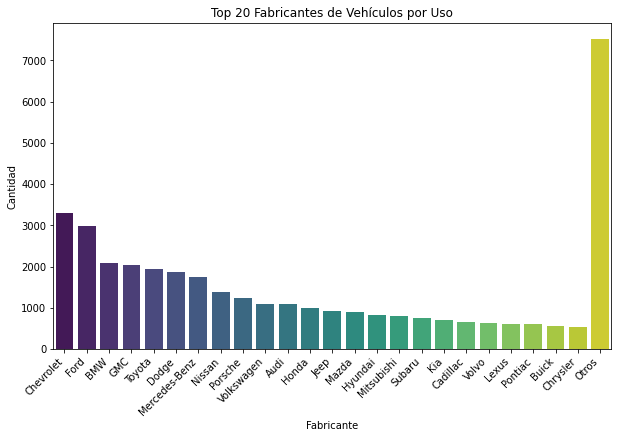

In [27]:
# Obtener los 24 fabricantes más comunes
top_manufacturers = fuel_economy['Manufacturer'].value_counts().head(24)

# Calcular la suma de los fabricantes restantes
otros = fuel_economy['Manufacturer'].value_counts().sum() - top_manufacturers.sum()

# Agregar 'otros' al dataframe de los principales fabricantes
top_manufacturers['Otros'] = otros

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette='viridis')
plt.xlabel('Fabricante')
plt.ylabel('Cantidad')
plt.title('Top 20 Fabricantes de Vehículos por Uso')
plt.xticks(rotation=45, ha='right')
plt.show()

**Revisamos los valores de la columna 'Fuel'**

In [28]:
fuel_economy['Fuel'].value_counts()

Fuel
Gasoline    36344
Diesel        952
Electric      503
CNG            60
Name: count, dtype: int64

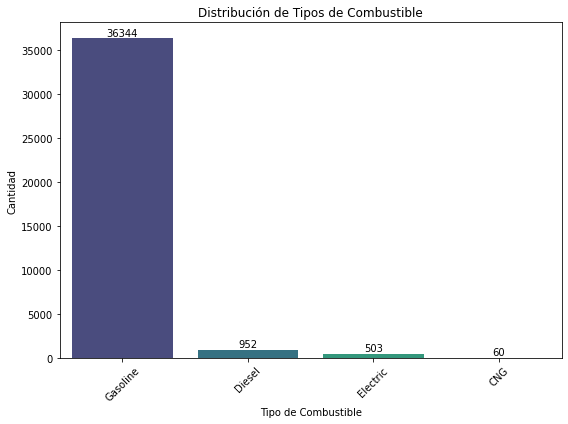

In [29]:
# Datos de la distribución de tipos de combustible
fuel_counts = fuel_economy['Fuel'].value_counts()

# Crear el gráfico de barras con paleta 'viridis'
plt.figure(figsize=(8, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='viridis')

# Agregar etiquetas de valores en cada barra
for i, value in enumerate(fuel_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.title('Distribución de Tipos de Combustible')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Revisamos los valores de la columna 'Category'**

In [30]:
fuel_economy['Category'].value_counts()

Category
Compact Cars                          5100
Midsize Cars                          4691
Subcompact Cars                       4263
Large Cars                            2394
Two Seaters                           1994
Sport Utility Vehicle - 4WD           1818
Small Sport Utility Vehicle 4WD       1570
Vans                                  1419
Small Station Wagons                  1416
Sport Utility Vehicle - 2WD           1386
Standard Pickup Trucks                1381
Minicompact Cars                      1322
Standard Sport Utility Vehicle 4WD    1268
Standard Pickup Trucks 4WD            1107
Special Purpose Vehicles              1104
Standard Pickup Trucks 2WD            1090
Small Sport Utility Vehicle 2WD        922
Special Purpose Vehicle 2WD            588
Midsize-Large Station Wagons           467
Standard Sport Utility Vehicle 2WD     439
Midsize Station Wagons                 423
Small Pickup Trucks 2WD                403
Small Pickup Trucks                    381
Mi

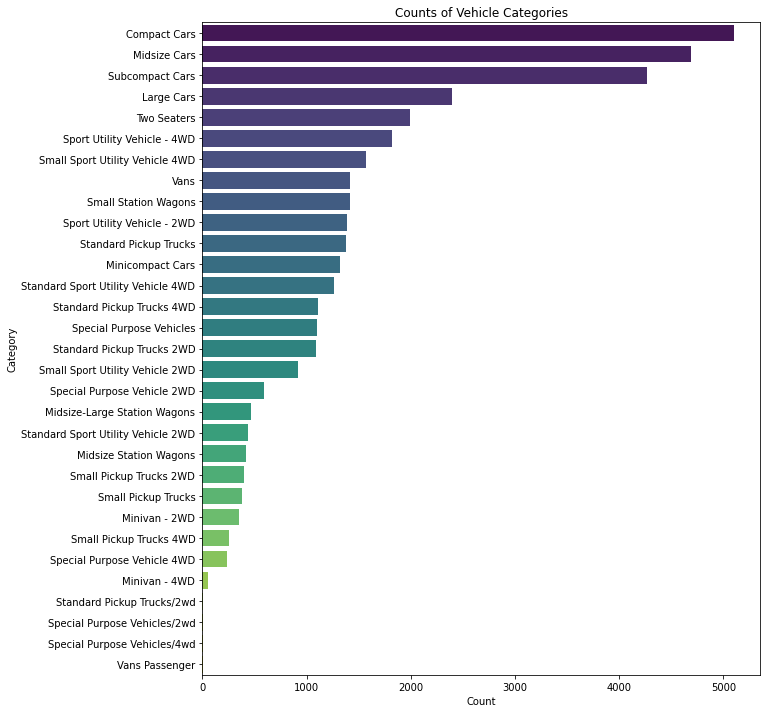

In [31]:
# Obtener el conteo de valores de la columna 'Category' y ordenar de mayor a menor
category_counts_sorted = fuel_economy['Category'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 12))
sns.barplot(x=category_counts_sorted.values, y=category_counts_sorted.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Counts of Vehicle Categories')
plt.show()

**Revisamos los valores de la columna 'Alternative Fuel'**

In [32]:
fuel_economy['Alternative Fuel'].value_counts()

Alternative Fuel
No          36263
E85          1276
Electric      296
CNG            16
LPG             8
Name: count, dtype: int64

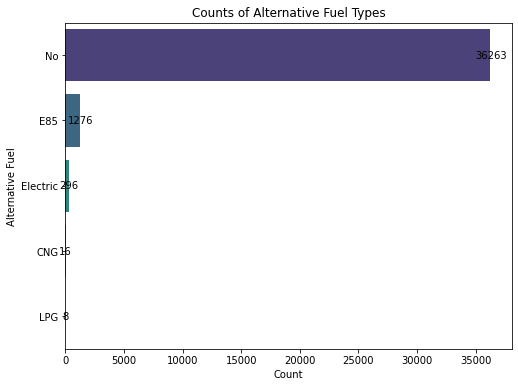

In [33]:
# Obtener el conteo de valores de la columna 'Alternative Fuel'
alternative_fuel_counts = fuel_economy['Alternative Fuel'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=alternative_fuel_counts.values, y=alternative_fuel_counts.index, palette='viridis')

# Agregar etiquetas de valor en cada barra
for i, count in enumerate(alternative_fuel_counts.values):
    plt.text(count + 20, i, str(count), ha='center', va='center')

plt.xlabel('Count')
plt.ylabel('Alternative Fuel')
plt.title('Counts of Alternative Fuel Types')
plt.show()

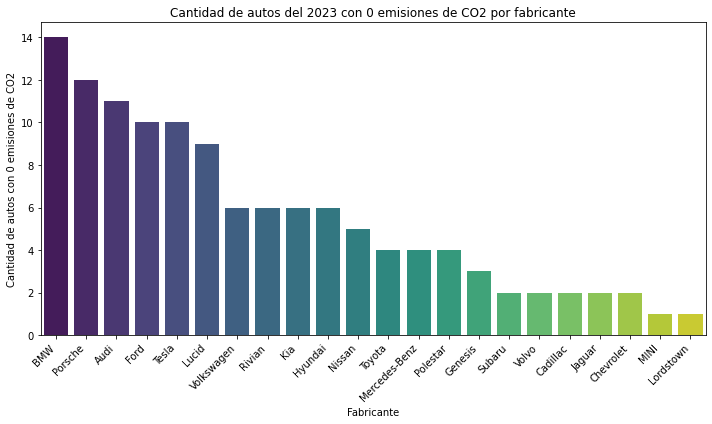

In [34]:
# Filtrar los datos para el año 2023 y aquellos con 0 emisiones de CO2
data_2023_zero_emissions = fuel_economy[(fuel_economy['Year'] == 2023) & (fuel_economy['CO2 (p/mile)'] == 0)]

# Contar la cantidad de autos con 0 emisiones de CO2 por fabricante
zero_emissions_counts = data_2023_zero_emissions['Manufacturer'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras utilizando la función barplot de Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_emissions_counts.index, y=zero_emissions_counts.values, palette='viridis')
plt.xlabel('Fabricante')
plt.ylabel('Cantidad de autos con 0 emisiones de CO2')
plt.title('Cantidad de autos del 2023 con 0 emisiones de CO2 por fabricante')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

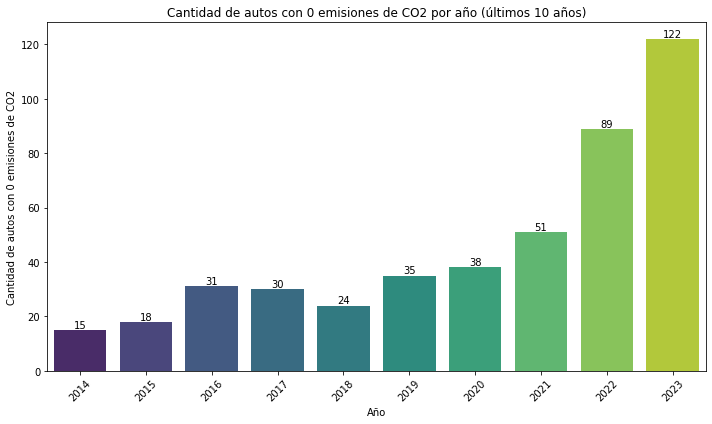

In [35]:
# Filtrar los datos para los últimos 10 años y aquellos con 0 emisiones de CO2
last_10_years_data = fuel_economy[fuel_economy['Year'] >= 2014]
zero_emissions_data = last_10_years_data[last_10_years_data['CO2 (p/mile)'] == 0]

# Contar la cantidad de autos con 0 emisiones de CO2 por año
zero_emissions_counts_by_year = zero_emissions_data['Year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=zero_emissions_counts_by_year.index, y=zero_emissions_counts_by_year.values, palette='viridis')
plt.xlabel('Año')
plt.ylabel('Cantidad de autos con 0 emisiones de CO2')
plt.title('Cantidad de autos con 0 emisiones de CO2 por año (últimos 10 años)')
plt.xticks(rotation=45)

# Añadir el número de cada barra
for index, value in enumerate(zero_emissions_counts_by_year):
    barplot.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()